In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
companies_df = pd.read_csv("../input/50_Startups.csv")
X = companies_df.iloc[:, :-1]
y = companies_df.loc[:, "Profit"]
companies_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

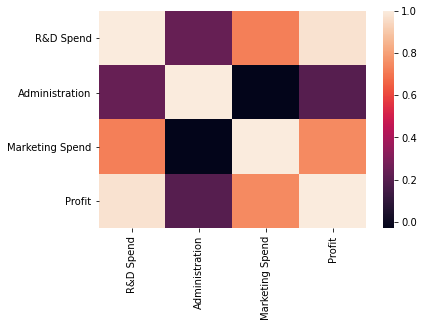

In [5]:
sns.heatmap(companies_df.corr())

In [6]:
one_hot_encoder = OneHotEncoder(sparse=False, drop="first")
encoded_states = one_hot_encoder.fit_transform(X["State"].to_numpy().reshape(-1, 1))
encoded_states_df = pd.DataFrame(encoded_states, columns=one_hot_encoder.get_feature_names())

X_encoded = pd.concat([X, encoded_states_df], axis=1).drop(columns=["State"])
X_encoded.head()

,R&D Spend,Administration,Marketing Spend,x0_Florida,x0_New York
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=0)

In [8]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = linear_regressor.predict(X_test)
y_pred

array([104440.72582616, 132253.81567698, 132872.07174272,  71707.78771428,
       178678.9934985 , 115078.13124331,  66093.9297267 ,  98759.7276409 ,
       114113.5994088 , 167979.49411476,  95786.77295823,  87785.3497979 ,
       110455.98228344])

In [10]:
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[ 7.80990589e-01  4.57976214e-02  3.35420038e-02 -5.21787358e+02
  1.11511973e+01]
41049.23809436463


In [11]:
r2_score(y_test, y_pred)

0.9315815199152059